<a href="https://colab.research.google.com/github/lmcanavals/aai/blob/main/09_hill_climbing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%file demo
4 5
0 10 1 20 2 20 3 40 4 10
1 20 0 10 3 30 2 50 4 30
2 30 1 20 4 12 3 40 0 10
4 50 3 30 2 15 0 20 1 15

Writing demo


In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [25]:
def randRep(n, m):
    rep = [i for i in range(n)]*m
    random.shuffle(rep)
    #rep = [1, 2, 0, 1, 2, 3, 1, 2, 0, 3, 0, 0, 1, 0, 3, 3, 2, 2, 3, 1]
    #rep = [1, 0, 0, 1, 2, 1, 0, 2, 1, 3, 3, 3, 2, 1, 0, 2, 3, 3, 0, 2]
    return np.array(rep)

In [26]:
def calcMakespan(rep, n, m, jobs):
    mstart = np.zeros((m), dtype=int)
    jend = np.zeros((m), dtype=int)
    idxs = np.zeros((n), dtype=int)
    makespan = 0
    for e in rep:
        i = idxs[e]
        idxs[e] += 1
        midx = jobs[e, i, 0]
        time = jobs[e, i, 1]
        #print(f"Job {e} task {i} to machine {midx} starting at {mstart[midx]} duration {time}")
        mstart[midx] = max(mstart[midx], jend[e]) + time
        jend[e] = mstart[midx]
        if mstart[midx] > makespan:
            makespan = mstart[midx]

    return makespan

In [36]:
def mkSolution(rep, n, m, jobs, makespan):
    mstart = np.zeros((m), dtype=int)
    jend = np.zeros((m), dtype=int)
    idxs = np.zeros((n), dtype=int)
    schedule = np.zeros((m*10, makespan))

    for e in rep:
        i = idxs[e]
        idxs[e] += 1
        midx = jobs[e, i, 0]
        time = jobs[e, i, 1]
        mstart[midx] = max(mstart[midx], jend[e])
        schedule[midx*10:(midx+1)*10, mstart[midx]:mstart[midx] + time] = e+1
        mstart[midx] += time
        jend[e] = mstart[midx]

    plt.subplots(figsize=(20, 10))
    plt.imshow(schedule)

In [54]:
import time

def swap1(rep):
    n = len(rep)
    i = random.randint(0, n-1)
    j = random.randint(0, n-1)
    rep[i], rep[j] = rep[j], rep[i]

def hillClimbing(n, m, jobs, delay):
    bestSolution = randRep(n, m)
    bestMakespan = calcMakespan(bestSolution, n, m, jobs)
    copy = np.zeros((n*m), dtype=int)
    timesup = False
    start = time.time()
    iter = 0
    #print(bestSolution, bestMakespan)
    progress = []
    while not timesup:
        iter += 1
        copy = bestSolution.copy()
        swap1(bestSolution)
        newMakespan = calcMakespan(bestSolution, n, m, jobs)
        if newMakespan < bestMakespan:
            bestMakespan = newMakespan
        else:
            bestSolution = copy.copy()
        if time.time() - start >= delay:
            timesup = True
        progress.append(bestMakespan)
    return bestSolution, bestMakespan, progress
    #print(bestSolution, bestMakespan, iter)

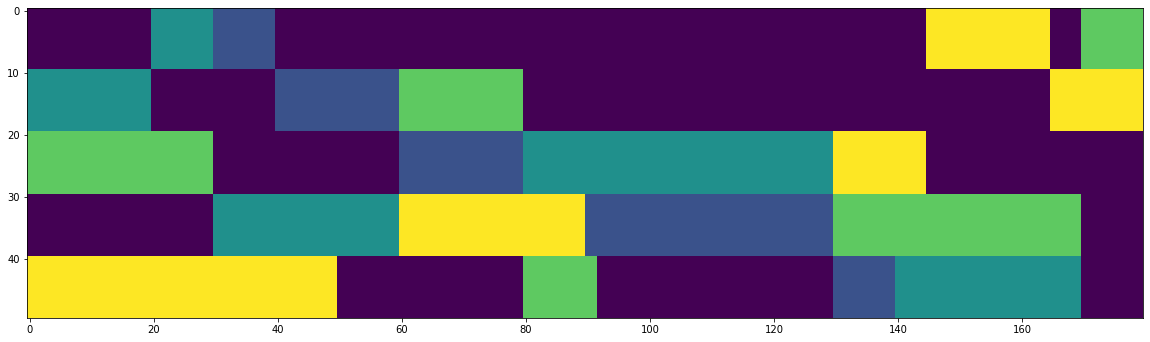

In [55]:
with open('demo') as f:
    n, m = [int(x) for x in f.readline().split()]
    jobs = np.zeros((n, m, 2), dtype=int)
    i = 0
    for line in f:
        jobs[i] = np.array([int(x) for x in line.split()]).reshape(m, 2)
        i += 1

    random.seed(1981)
    rep, makespan, data = hillClimbing(n, m, jobs, 60)
    mkSolution(rep, n, m, jobs, makespan)

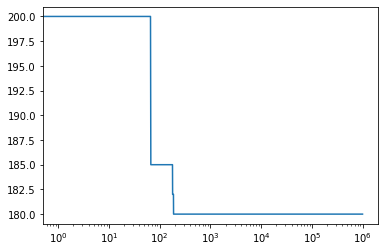

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(data)
ax.set_xscale('log')
plt.show()